In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

import shutil
from sklearn.model_selection import train_test_split

sys.path.append('../modeling') 
from preprocessing import df_from_directory, plot_color_distribution, rename_subfolder 

RSEED = 42
DATASET_PATH = '../data/images/' 

In [ ]:
os.rename("../data/data", "../data/images")

In [2]:
df = df_from_directory(DATASET_PATH)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95859 entries, 0 to 95858
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  95859 non-null  object
 1   class       95859 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [5]:
file_types = {}

def count_file_types(folder): 
    for root, dirs, files in os.walk(folder): 
        for file in files: # Get the file extension 
            file_extension = os.path.splitext(file)[1][1:].lower()
            file_types[file_extension] = file_types.get(file_extension, 0) + 1

folder_path = '../data'
count_file_types(folder_path)

for file_type, count in file_types.items(): print(f"{file_type}: {count}")

: 1
zip: 1
jpg: 93336
jpeg: 2522
png: 1


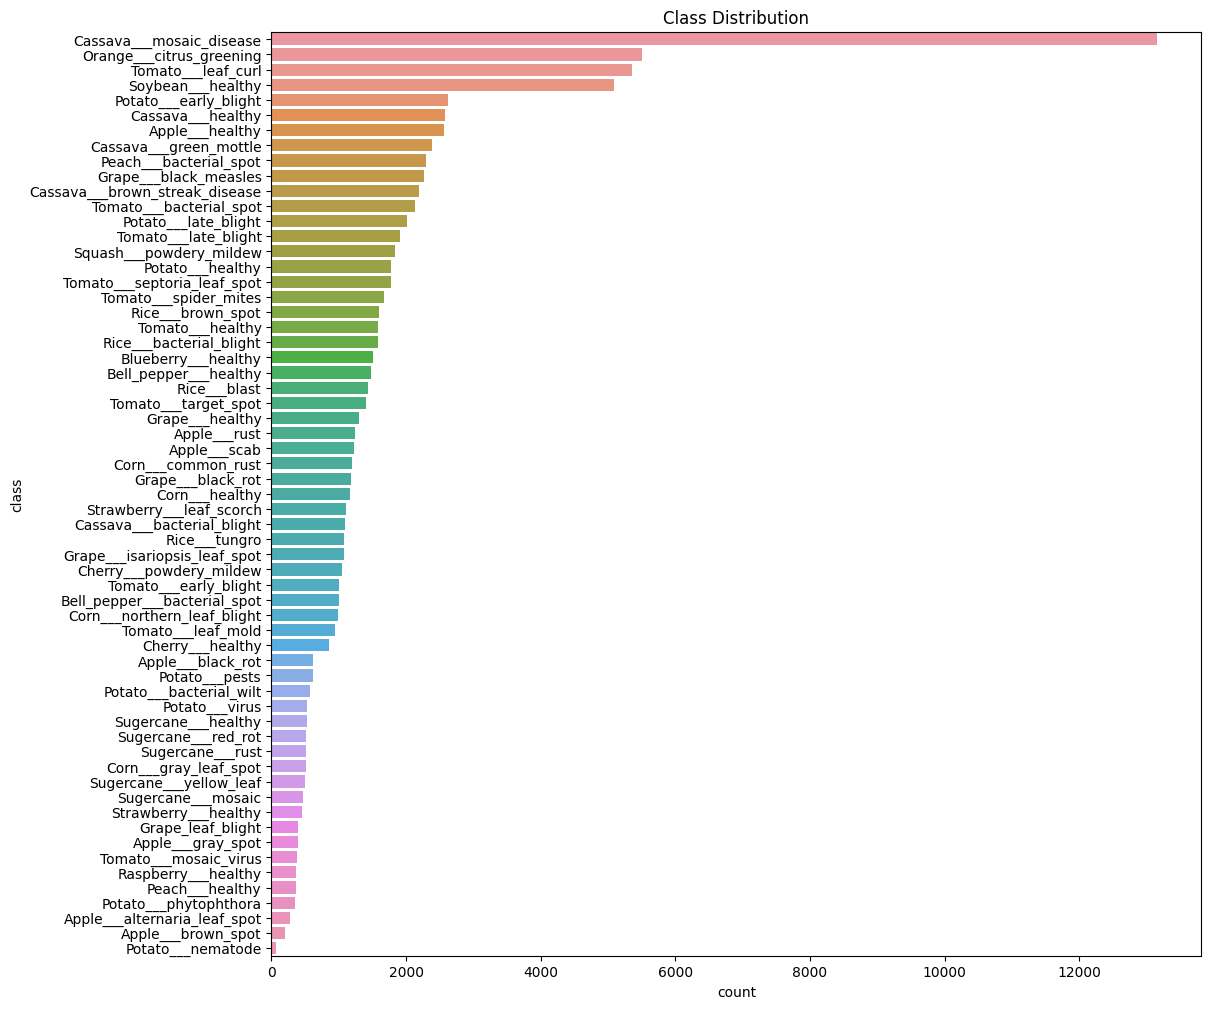

In [6]:
# Check the distribution of classes
class_counts = df['class'].value_counts()
plt.figure(figsize=(12, 12))
sns.countplot(y='class', data=df, order=class_counts.index)
plt.title('Class Distribution')
plt.show()

In [7]:
problematic_rows = df[df['class'].apply(lambda x: len(x.split('___')) < 2)]
print("Problematic Rows:")
print(problematic_rows)

Problematic Rows:
                                              image_path              class
22632  ../data/images/Grape_leaf_blight/5d261e2e-5541...  Grape_leaf_blight
22633  ../data/images/Grape_leaf_blight/d5a4f65f-7d27...  Grape_leaf_blight
22634  ../data/images/Grape_leaf_blight/54a17d93-22ce...  Grape_leaf_blight
22635  ../data/images/Grape_leaf_blight/04d59dc2-2133...  Grape_leaf_blight
22636  ../data/images/Grape_leaf_blight/d5d5532f-7fbd...  Grape_leaf_blight
...                                                  ...                ...
23027  ../data/images/Grape_leaf_blight/9c6fb219-6111...  Grape_leaf_blight
23028  ../data/images/Grape_leaf_blight/ba8778b1-8caf...  Grape_leaf_blight
23029  ../data/images/Grape_leaf_blight/b59823b4-69a0...  Grape_leaf_blight
23030  ../data/images/Grape_leaf_blight/2c135c30-428c...  Grape_leaf_blight
23031  ../data/images/Grape_leaf_blight/6e4d7942-a265...  Grape_leaf_blight

[400 rows x 2 columns]


In [9]:
rename_subfolder(
    parent_dir = DATASET_PATH,
    subfolder_name = "Grape_leaf_blight",
    new_name = "Grape___leaf_blight"
)

Grape_leaf_blight renamed to Grape___leaf_blight successfully.


'Grape___leaf_blight'

In [3]:
df = df_from_directory(DATASET_PATH)

In [4]:
df['plant_type'] = df['class'].apply(lambda x: x.split('___')[0])
plant_type_counts = df['plant_type'].value_counts()
print(plant_type_counts)

plant_type
Cassava        21397
Tomato         18160
Potato          8552
Apple           6533
Grape           6232
Rice            5704
Orange          5507
Soybean         5090
Corn            3852
Peach           2657
Sugercane       2521
Bell_pepper     2475
Cherry          1906
Squash          1835
Strawberry      1565
Blueberry       1502
Raspberry        371
Name: count, dtype: int64


In [5]:
df['disease_type'] = df['class'].apply(lambda x: x.split('___')[1])
disease_type_counts = df['disease_type'].value_counts()
print(disease_type_counts)

disease_type
healthy                 21615
mosaic_disease          13158
citrus_greening          5507
bacterial_spot           5421
leaf_curl                5357
late_blight              3929
early_blight             3628
powdery_mildew           2887
bacterial_blight         2671
green_mottle             2386
black_measles            2271
brown_streak_disease     2189
brown_spot               1806
black_rot                1801
septoria_leaf_spot       1771
rust                     1755
spider_mites             1676
blast                    1440
target_spot              1404
scab                     1222
common_rust              1192
leaf_scorch              1109
tungro                   1080
isariopsis_leaf_spot     1076
northern_leaf_blight      985
leaf_mold                 952
pests                     611
bacterial_wilt            569
virus                     532
red_rot                   518
gray_leaf_spot            513
yellow_leaf               505
mosaic                    4

In [13]:
df

image_path   
0      ../data/images/Tomato___spider_mites/fa05ccd2-...  \
1      ../data/images/Tomato___spider_mites/fd3b6292-...   
2      ../data/images/Tomato___spider_mites/82306885-...   
3      ../data/images/Tomato___spider_mites/9c7f0991-...   
4      ../data/images/Tomato___spider_mites/d7c5cad4-...   
...                                                  ...   
95854  ../data/images/Soybean___healthy/57c18b39-2a33...   
95855  ../data/images/Soybean___healthy/4fdc663e-a8ea...   
95856  ../data/images/Soybean___healthy/df807f13-078b...   
95857  ../data/images/Soybean___healthy/60bf9858-951a...   
95858  ../data/images/Soybean___healthy/c7f4b7b2-b13c...   

                       class plant_type  disease_type  
0      Tomato___spider_mites     Tomato  spider_mites  
1      Tomato___spider_mites     Tomato  spider_mites  
2      Tomato___spider_mites     Tomato  spider_mites  
3      Tomato___spider_mites     Tomato  spider_mites  
4      Tomato___spider_mites     Tomato  spider_mites  
...                      ...        ...           ...  
95854      Soybean___healthy    Soybean       healthy  
95855      Soybean___healthy    Soybean       healthy  
95856      Soybean___healthy    Soybean       healthy  
95857      Soybean___healthy    Soybean       healthy  
95858      Soybean___healthy    Soybean       healthy  

[95859 rows x 4 columns]

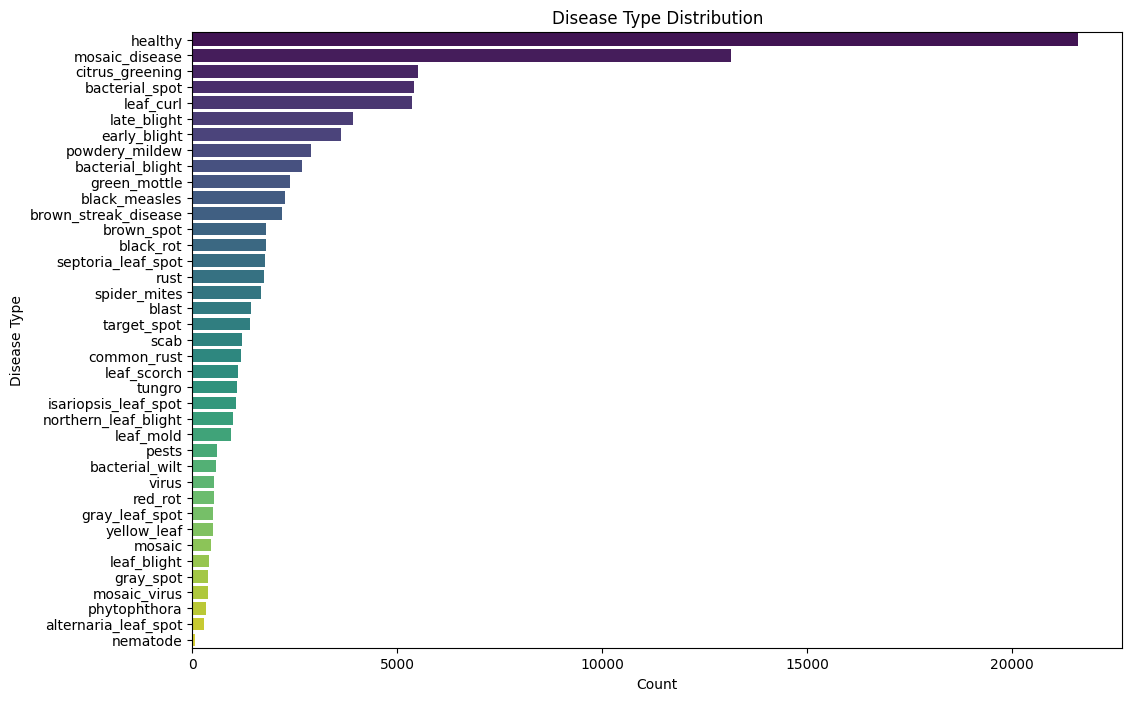

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(y='disease_type', data=df, order=df['disease_type'].value_counts().index, palette='viridis')
plt.title('Disease Type Distribution')
plt.xlabel('Count')
plt.ylabel('Disease Type')
plt.show()

In [ ]:
'''
# Display sample images from each class
class_folders = os.listdir(DATASET_PATH)
for class_folder in class_folders:
    class_path = os.path.join(DATASET_PATH, class_folder)
    sample_image = os.listdir(class_path)[0]
    image_path = os.path.join(class_path, sample_image)
    # Display the image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f"Class: {class_folder}")
    plt.show()
'''

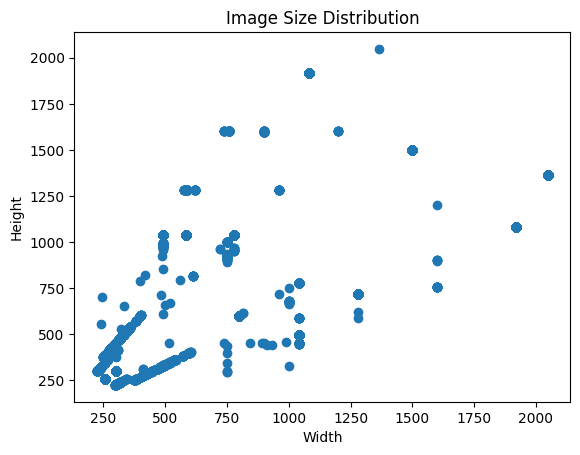

In [22]:
image_sizes = df['image_path'].apply(lambda x: Image.open(x).size)
width, height = zip(*image_sizes)
plt.scatter(width, height)
plt.title('Image Size Distribution')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [23]:
df['image_path'].apply(lambda x: Image.open(x).size).value_counts()

image_path
(256, 256)      60409
(800, 600)      21397
(300, 300)       4624
(1500, 1500)     2328
(2048, 1365)     1729
                ...  
(240, 553)          1
(520, 671)          1
(323, 525)          1
(913, 440)          1
(750, 909)          1
Name: count, Length: 429, dtype: int64

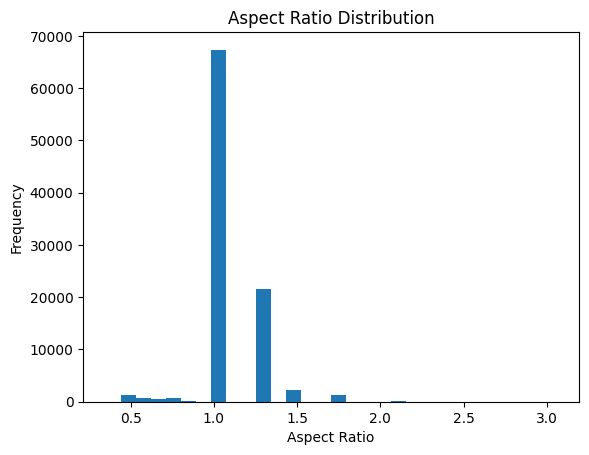

In [24]:
aspect_ratios = df['image_path'].apply(lambda x: Image.open(x).size[0] / Image.open(x).size[1])
plt.hist(aspect_ratios, bins=30)
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()

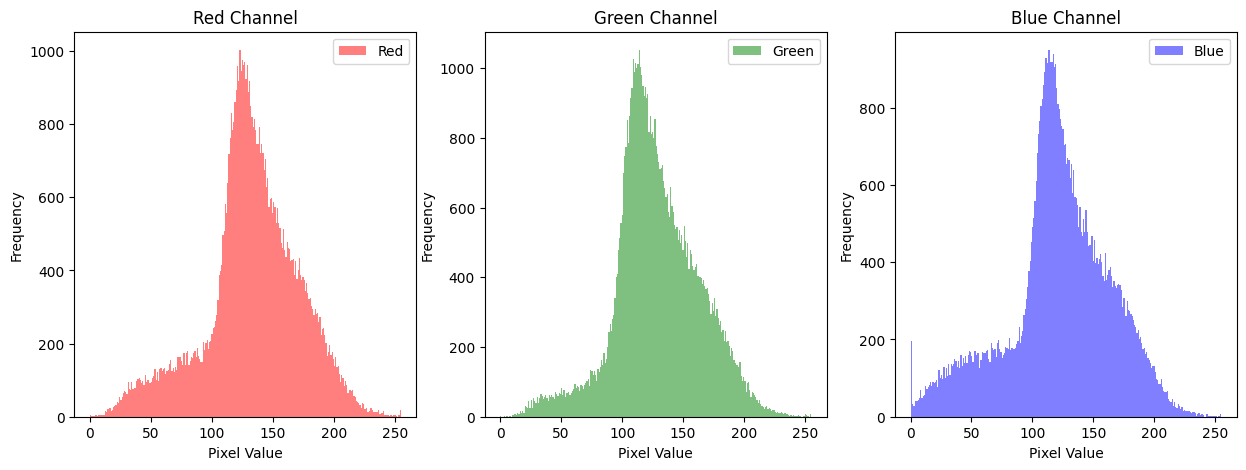

In [6]:
plot_color_distribution(df['image_path'].iloc[0])

In [16]:
X = df['image_path']
y = df['disease_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RSEED)

train_dir = '../data/train/'
test_dir = '../data/test/'

if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

for image_path, label in zip(X_train, y_train):
    dest_folder = os.path.join(train_dir, label)
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    shutil.copy(image_path, dest_folder)

for image_path, label in zip(X_test, y_test):
    dest_folder = os.path.join(test_dir, label)
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    shutil.copy(image_path, dest_folder)